<a href="https://colab.research.google.com/github/aksanaboo/customer_shopping_trend/blob/main/Customershoppingtrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [16]:
customer_data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shopping_trends.csv')

In [17]:
customer_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
customer_data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [18]:
#check for missing values
customer_data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [19]:
#check for duplicated values
customer_data.duplicated().sum()

0

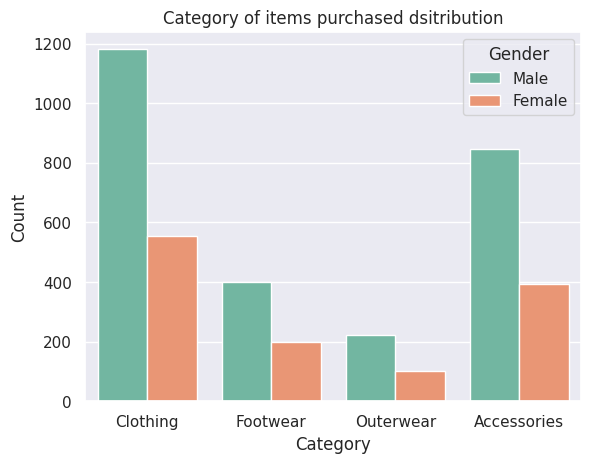

In [27]:
#Category of items purchased by Gender
sns.set(style='darkgrid')
sns.countplot(data=customer_data, x='Category',hue='Gender',palette='Set2')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category of items purchased dsitribution')
plt.show()

In [21]:
#Category and Items purchased within
fig = px.treemap(customer_data, path=[px.Constant("Category"),'Category', 'Item Purchased'],color='Category')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(marker=dict(cornerradius=5))
fig.show()

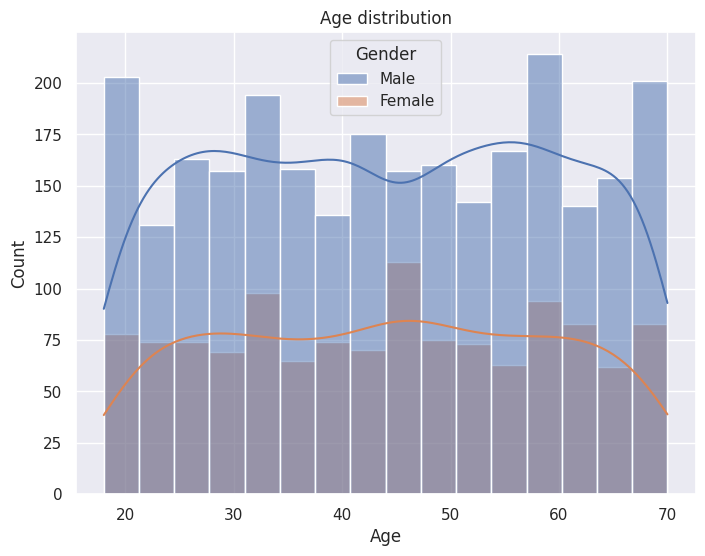

In [38]:
#Age distribution in Dataset
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.histplot(data=customer_data,x='Age',hue='Gender',kde=True,)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

In [43]:
# location
print('There are',customer_data.Location.nunique(),'unique locations in the dataset')
print(customer_data.Location.value_counts())

There are 50 unique locations in the dataset
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey

In [44]:
# Relationship between Purchase Amount (USD) and Review Rating -- hue = location
fig = px.scatter(customer_data, x='Review Rating', y='Purchase Amount (USD)', color='Location',
                 title='Relationship between Purchase Amount(USD) and Ratings with color-based Locations')
fig.update_xaxes(title_text='Review Ratings')
fig.update_yaxes(title_text='Price (USD)')
fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(legend=dict(title='Location'))